In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [261]:
import h2o
import os

In [262]:
h2o.cluster().shutdown()

In [175]:
h2o.init(max_mem_size = "2G")             #specify max number of bytes. uses all cores by default.
h2o.remove_all() 

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.121-b13, mixed mode)
  Starting server from D:\ProgramData\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\ARYAN~1.SIN\AppData\Local\Temp\tmpyvr0_pss
  JVM stdout: C:\Users\ARYAN~1.SIN\AppData\Local\Temp\tmpyvr0_pss\h2o_aryan_singh_started_from_python.out
  JVM stderr: C:\Users\ARYAN~1.SIN\AppData\Local\Temp\tmpyvr0_pss\h2o_aryan_singh_started_from_python.err
  Server is running at http://127.0.0.1:54339
Connecting to H2O server at http://127.0.0.1:54339... successful.


H2O cluster uptime:,06 secs
H2O cluster timezone:,Asia/Kolkata
H2O data parsing timezone:,UTC
H2O cluster version:,3.18.0.9
H2O cluster version age:,"7 days, 22 hours and 38 minutes"
H2O cluster name:,H2O_from_python_aryan_singh_wckbpx
H2O cluster total nodes:,1
H2O cluster free memory:,1.778 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


In [176]:
h2o.remove_all() 

In [177]:
from h2o.estimators.random_forest import H2ORandomForestEstimator

In [188]:
#cdf = pd.read_csv('D:/upgrad/EDA/eda-case-study/loan.csv', low_memory=False)
cdf = h2o.import_file(os.path.realpath("loan.csv"))
#cdf = pd.read_csv('D:/upgrad/EDA/eda-case-study/loan.csv', low_memory=False)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [189]:
mask = cdf["loan_status"] != 'Current'
cdf = cdf[mask,:]

In [190]:
mask = cdf.filter_na_cols(frac=0.01)
cdf = cdf[:,mask]

In [191]:
cdf.isna().sum()

224.0

In [193]:
train, valid, test = cdf.split_frame([0.6, 0.2], seed=1234)

In [194]:
cdf_headers = cdf.col_names     #last column is Cover_Type, our desired response variable 

In [195]:
type(cdf_headers)

list

In [196]:
cdf_x=cdf_headers.remove('loan_status')

In [197]:
cdf_y='loan_status'

In [198]:
rf_v1 = H2ORandomForestEstimator(
    model_id="rf_covType_v1",
    ntrees=200,
    stopping_rounds=2,
    score_each_iteration=True,
    seed=1000000)

In [199]:
rf_v1.train(cdf_x, cdf_y, training_frame=train, validation_frame=valid)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [200]:
rf_v1

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  rf_covType_v1


ModelMetricsMultinomial: drf
** Reported on train data. **

MSE: 0.0092885690320231
RMSE: 0.09637722257890138
LogLoss: 0.07975614251356966
Mean Per-Class Error: 0.021186021186021184
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



Charged Off,Current,Fully Paid,Error,Rate
3153.0,0.0,214.0,0.0635581,"214 / 3,367"
0.0,0.0,0.0,nan,0 / 0
0.0,0.0,19858.0,0.0,"0 / 19,858"
3153.0,0.0,20072.0,0.0092142,"214 / 23,225"


Top-3 Hit Ratios: 


k,hit_ratio
1,0.9907858
2,0.9987082
3,0.9999999



ModelMetricsMultinomial: drf
** Reported on validation data. **

MSE: 0.009511906806791261
RMSE: 0.09752900495130287
LogLoss: 0.05410583973701903
Mean Per-Class Error: 0.02464788732394366
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



Charged Off,Current,Fully Paid,Error,Rate
1052.0,0.0,84.0,0.0739437,"84 / 1,136"
0.0,0.0,0.0,nan,0 / 0
0.0,0.0,6607.0,0.0,"0 / 6,607"
1052.0,0.0,6691.0,0.0108485,"84 / 7,743"


Top-3 Hit Ratios: 


k,hit_ratio
1,0.9891515
2,0.9996125
3,0.9999999


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_classification_error,validation_rmse,validation_logloss,validation_classification_error
,2018-05-19 08:41:30,0.111 sec,0.0,nan,nan,nan,nan,nan,nan
,2018-05-19 08:41:31,1.536 sec,1.0,0.2300049,1.5549183,0.0440950,0.2290562,1.5362394,0.0445564
,2018-05-19 08:41:32,2.207 sec,2.0,0.2304593,1.5287616,0.0456835,0.1691345,0.5846603,0.0302208
,2018-05-19 08:41:32,2.635 sec,3.0,0.2158956,1.2846803,0.0402137,0.1471281,0.2779913,0.0263464
,2018-05-19 08:41:33,3.076 sec,4.0,0.1880391,0.9313189,0.0318242,0.1312820,0.1858211,0.0192432
---,---,---,---,---,---,---,---,---,---
,2018-05-19 08:41:38,7.966 sec,20.0,0.0989468,0.0922753,0.0096448,0.0990208,0.0548071,0.0116234
,2018-05-19 08:41:38,8.216 sec,21.0,0.0970738,0.0858940,0.0091712,0.0977008,0.0537668,0.0109777
,2018-05-19 08:41:38,8.550 sec,22.0,0.0969730,0.0837239,0.0089989,0.0977711,0.0541934,0.0113651
,2018-05-19 08:41:39,8.883 sec,23.0,0.0965647,0.0836295,0.0090850,0.0977845,0.0541253,0.0113651



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
recoveries,38872.7460938,1.0,0.3920038
total_rec_prncp,10603.7509766,0.2727811,0.1069312
collection_recovery_fee,6816.0004883,0.1753414,0.0687345
zip_code,5592.4321289,0.1438651,0.0563957
last_pymnt_amnt,4516.3593750,0.1161832,0.0455443
---,---,---,---
verification_status,70.6177216,0.0018166,0.0007121
home_ownership,51.3254776,0.0013203,0.0005176
delinq_2yrs,34.8711014,0.0008971,0.0003517
annual_inc,27.4418831,0.0007059,0.0002767



See the whole table with table.as_data_frame()


In [201]:
rf_v1.confusion_matrix()

TypeError: confusion_matrix() missing 1 required positional argument: 'data'

In [2]:
cdf = pd.read_csv('/loan.csv',low_memory=False)

In [3]:
cdf.dropna(axis='columns',how='all',inplace=True)

In [4]:
cdf.drop(['desc','mths_since_last_delinq','mths_since_last_record', 'next_pymnt_d', 'collections_12_mths_ex_med', 'chargeoff_within_12_mths','tax_liens'],axis='columns',inplace=True)

In [5]:
cdf = cdf.dropna(axis=0, subset=['revol_util','last_pymnt_d','last_credit_pull_d'])

In [6]:
cdf['pub_rec_bankruptcies'].fillna(0, inplace=True)

In [7]:
cdf = cdf.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [8]:
round(100*(cdf.isnull().sum()/len(cdf.index)), 2)

id                         0.0
member_id                  0.0
loan_amnt                  0.0
funded_amnt                0.0
funded_amnt_inv            0.0
term                       0.0
int_rate                   0.0
installment                0.0
grade                      0.0
sub_grade                  0.0
emp_title                  0.0
emp_length                 0.0
home_ownership             0.0
annual_inc                 0.0
verification_status        0.0
issue_d                    0.0
loan_status                0.0
pymnt_plan                 0.0
url                        0.0
purpose                    0.0
title                      0.0
zip_code                   0.0
addr_state                 0.0
dti                        0.0
delinq_2yrs                0.0
earliest_cr_line           0.0
inq_last_6mths             0.0
open_acc                   0.0
pub_rec                    0.0
revol_bal                  0.0
revol_util                 0.0
total_acc                  0.0
initial_

In [10]:
cdf.drop(['last_credit_pull_d','last_credit_pull_d','recoveries','collection_recovery_fee','issue_d','id','member_id'],axis='columns',inplace=True)

In [11]:
cdf_final = cdf[(cdf.loan_status=='Fully Paid') | (cdf.loan_status=='Charged Off')]

In [12]:
cdf_final.groupby('loan_status')['id'].count()

loan_status
Charged Off     5543
Fully Paid     32915
Name: id, dtype: int64

In [13]:
cdf_final['int_rate'] = cdf_final['int_rate'].apply(lambda x: float(x[:-1]))

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
cdf_final.drop(['funded_amnt','funded_amnt_inv','url','last_pymnt_d','zip_code'],axis='columns',inplace=True)

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Use one-hot encoding to convert numerical columns with categorical data

In [15]:
cols = cdf_final.columns
num_cols = cdf_final._get_numeric_data().columns
cat_variables = list(set(cols) - set(num_cols))
cat_variables.remove('loan_status')
cat_variables

['term',
 'grade',
 'addr_state',
 'emp_title',
 'revol_util',
 'verification_status',
 'purpose',
 'initial_list_status',
 'sub_grade',
 'home_ownership',
 'title',
 'application_type',
 'earliest_cr_line',
 'emp_length',
 'pymnt_plan']

In [16]:
for variable in cat_variables:
    dummies = pd.get_dummies(cdf_final[variable], prefix=variable)
    cdf_final = pd.concat([cdf_final, dummies], axis=1)
    cdf_final.drop([variable], axis=1, inplace=True)

In [17]:
cdf_final['loan_status'].head()

0     Fully Paid
1    Charged Off
2     Fully Paid
3     Fully Paid
5     Fully Paid
Name: loan_status, dtype: object

In [18]:
ind_headers = list(cdf_final.columns.values)

In [19]:
ind_headers.remove('loan_status')

Now we will build a random forrest classifier to predict whether a prospective customer is likely to default on his/her loan or not.

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [21]:
 # Split dataset into train and test dataset
train_x, test_x, train_y, test_y = train_test_split(cdf_final[ind_headers], cdf_final['loan_status'],
                                                    train_size=0.7)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [22]:
    # Train and Test dataset size details
    print("Train_x Shape :: ", train_x.shape)
    print("Train_y Shape :: ", train_y.shape)
    print("Test_x Shape :: ", test_x.shape)
    print("Test_y Shape :: ", test_y.shape)

Train_x Shape ::  (26920, 48944)
Train_y Shape ::  (26920,)
Test_x Shape ::  (11538, 48944)
Test_y Shape ::  (11538,)


In [23]:
clf = RandomForestClassifier()
trained_model = clf.fit(train_x, train_y)

In [24]:
print(trained_model)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [25]:
predictions = trained_model.predict(test_x)

In [26]:
for i in range(0, 5):
    print("Actual outcome :: {} and Predicted outcome :: {}".format(list(test_y)[i], predictions[i]))

Actual outcome :: Fully Paid and Predicted outcome :: Fully Paid
Actual outcome :: Fully Paid and Predicted outcome :: Fully Paid
Actual outcome :: Fully Paid and Predicted outcome :: Fully Paid
Actual outcome :: Fully Paid and Predicted outcome :: Fully Paid
Actual outcome :: Fully Paid and Predicted outcome :: Fully Paid


Now doing the accuracy calculations

In [27]:
print("Train Accuracy :: ", accuracy_score(train_y, trained_model.predict(train_x)))
print("Test Accuracy  :: ", accuracy_score(test_y, predictions))

Train Accuracy ::  0.9978454680534918
Test Accuracy  ::  0.9365574622984919


Now printing the confusion matrix for more details

In [28]:
print(" Confusion matrix ", confusion_matrix(test_y, predictions))

 Confusion matrix  [[1018  677]
 [  55 9788]]


# Checking Parameter Importance from model

In [29]:
trained_model.feature_importances_

array([0.01228449, 0.0138185 , 0.01827838, ..., 0.000921  , 0.0015409 ,
       0.        ])

In [30]:
cdf_no_ls = cdf_final.loc[:, cdf_final.columns != 'loan_status']

In [31]:
feature_importances  = pd.Series(trained_model.feature_importances_, index=cdf_no_ls.columns)

In [32]:
def graph_feature_importances(model, feature_names, autoscale=True, headroom=0.05, width=10, summarized_columns=None):
    """
    
    Graphs the feature importances of a random decision forest using a horizontal bar chart. 
    Probably works but untested on other sklearn.ensembles.
    
    Parameters
    ----------
    ensemble = Name of the ensemble whose features you would like graphed.
    feature_names = A list of the names of those featurs, displayed on the Y axis.
    autoscale = True (Automatically adjust the X axis size to the largest feature +.headroom) / False = scale from 0 to 1
    headroom = used with autoscale, .05 default
    width=figure width in inches
    summarized_columns = a list of column prefixes to summarize on, for dummy variables (e.g. ["day_"] would summarize all day_ vars
    """
    
    if autoscale:
        x_scale = model.feature_importances_.max()+ headroom
    else:
        x_scale = 1
    
    feature_dict=dict(zip(feature_names, model.feature_importances_))
    
    if summarized_columns: 
        #some dummy columns need to be summarized
        for col_name in summarized_columns: 
            #sum all the features that contain col_name, store in temp sum_value
            sum_value = sum(x for i, x in feature_dict.items() if col_name in i )  
            
            #now remove all keys that are part of col_name
            keys_to_remove = [i for i in feature_dict.keys() if col_name in i ]
            for i in keys_to_remove:
                feature_dict.pop(i)
            #lastly, read the summarized field
            feature_dict[col_name] = sum_value
        
    results = pd.Series(feature_dict)
    results.sort_values(inplace=True)
    results.plot(kind="barh", figsize=(width,len(results)/4), xlim=(0,x_scale))

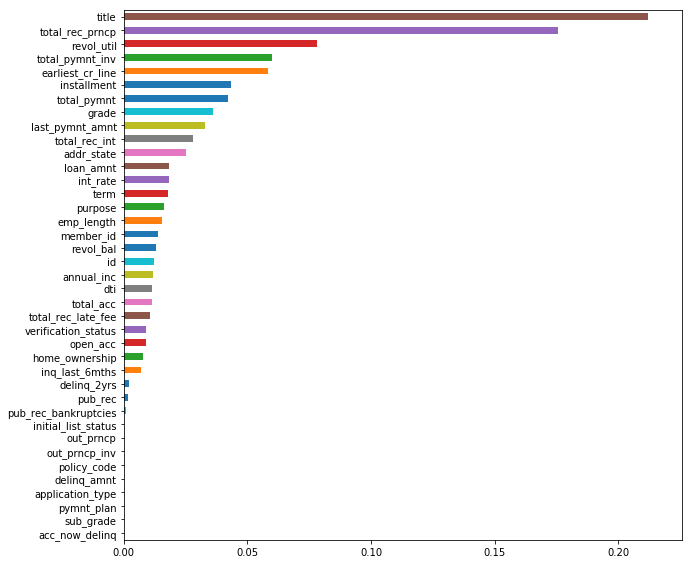

In [33]:
graph_feature_importances(trained_model, cdf_no_ls.columns, summarized_columns=cat_variables)